## Fifa 19

Dataset: https://www.kaggle.com/karangadiya/fifa19

Taking a closer look into:

- Countries
- Clubs
- Players

In [1]:
import numpy as np 
import pandas as pd 
import re
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="whitegrid")

### I. Loading the data

In [2]:
data = pd.read_csv('./data.csv', index_col = 'Unnamed: 0')

In [3]:
data.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
data.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

**Key columns:**

ID: unique id for every player

Name: name

Age: age

Nationality: nationality

Overall: overall rating

Potential: potential rating

Club: current club

Value: current market value

Wage: current wage

Position: position on the pitch


### II. Converting numeric columns

In [5]:
data['Wage'].head()

0    €565K
1    €405K
2    €290K
3    €260K
4    €355K
Name: Wage, dtype: object

In [6]:
data['Value'].head()

0    €110.5M
1       €77M
2    €118.5M
3       €72M
4      €102M
Name: Value, dtype: object

In [7]:
data['Wage'] = data['Wage'].apply(lambda x: int(re.findall('\d+', x)[0] + '000'))
data['Value'] = data['Value'].apply(lambda x: 'M' in x and int((re.findall('\d+\.*\d*', x)[0] + '000000').replace('.', '')) or int((re.findall('\d+\.*\d*', x)[0] + '000').replace('.', '')))

In [8]:
data['Wage'].head()

0    565000
1    405000
2    290000
3    260000
4    355000
Name: Wage, dtype: int64

In [9]:
data['Value'].head()

0    1105000000
1      77000000
2    1185000000
3      72000000
4     102000000
Name: Value, dtype: int64

### III. Country 

- Which are the top 10 most popular countries? 
- Comparing these 10 countries in terms of overall score and potential score.

In [10]:
data['Nationality'].value_counts().head()

England      1662
Germany      1198
Spain        1072
Argentina     937
France        914
Name: Nationality, dtype: int64

In [11]:
# top 10 most popular countries
top_ten = data['Nationality'].value_counts().head(10)
top_ten_countries = data['Nationality'].value_counts().head(10).index.values
top_ten_countries_df = data.loc[data['Nationality'].isin(top_ten_countries), :]

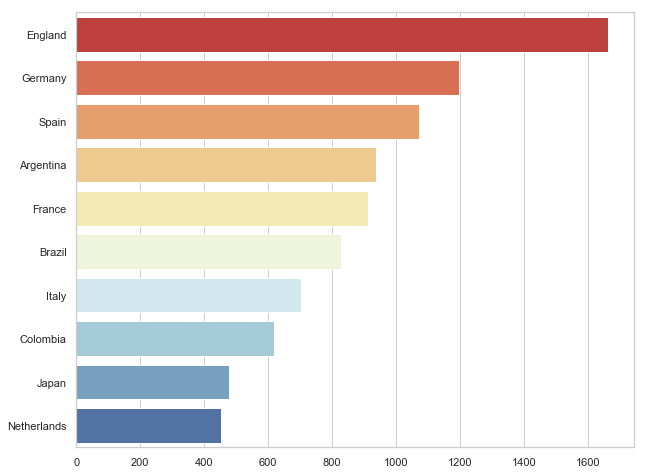

In [12]:
plt.figure(figsize=(10, 8))
p = sns.barplot(x = top_ten.values, y = top_ten.index, palette = "RdYlBu")

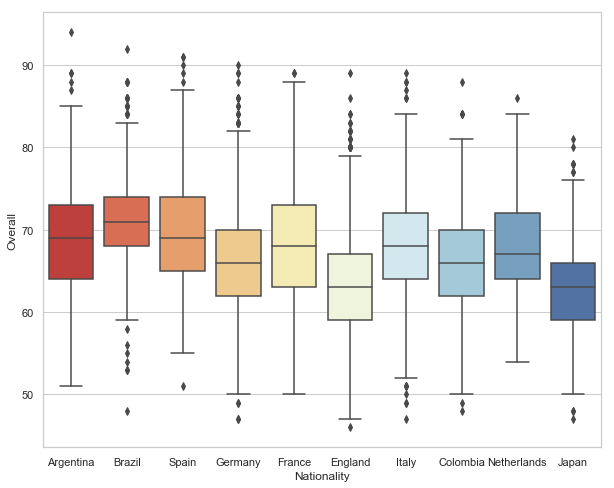

In [13]:
# visualising it against overall score
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))
p = sns.boxplot(x = 'Nationality', y = 'Overall', data = top_ten_countries_df, palette = "RdYlBu")

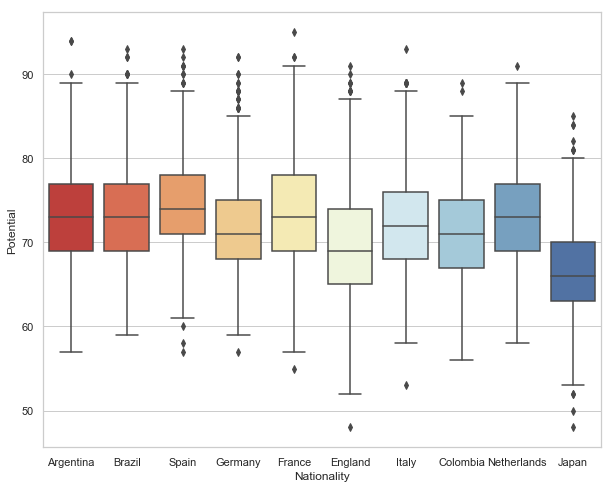

In [14]:
# visualising it against potential score
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))
p = sns.boxplot(x = 'Nationality', y = 'Potential', data = top_ten_countries_df, palette = "RdYlBu")

### IV. Clubs

- Wages of players across clubs
- Market value of players across clubs

In [15]:
# getting top ten clubs
top_ten_clubs = ['FC Barcelona', 'Real Madrid', 'Manchester City', 'Arsenal', 'Liverpool', 'Manchester United', 'Borussia Dortmund', 'FC Bayern München', 'Juventus', 'Paris Saint-Germain']
top_ten_clubs_df = data.loc[data['Club'].isin(top_ten_clubs), :]

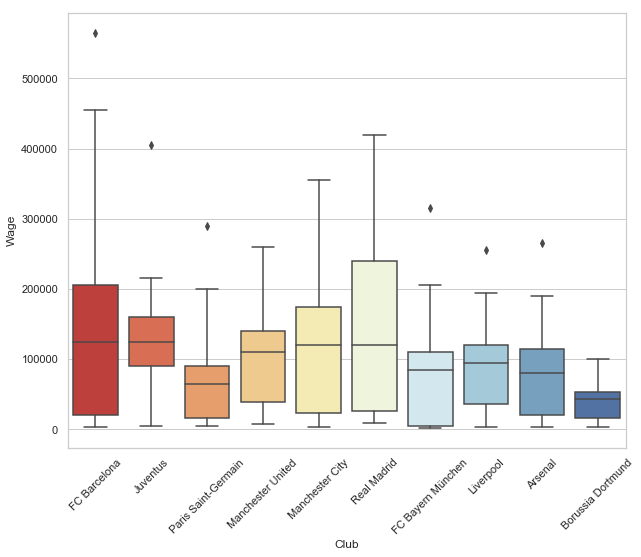

In [16]:
# plotting against players' wages
sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
p = sns.boxplot(x = 'Club', y = 'Wage', data = top_ten_clubs_df, palette = "RdYlBu")
p = plt.xticks(rotation=45)

We can see that the top 2 clubs in terms of players' wages are FC Barcelona and Real Madrid.

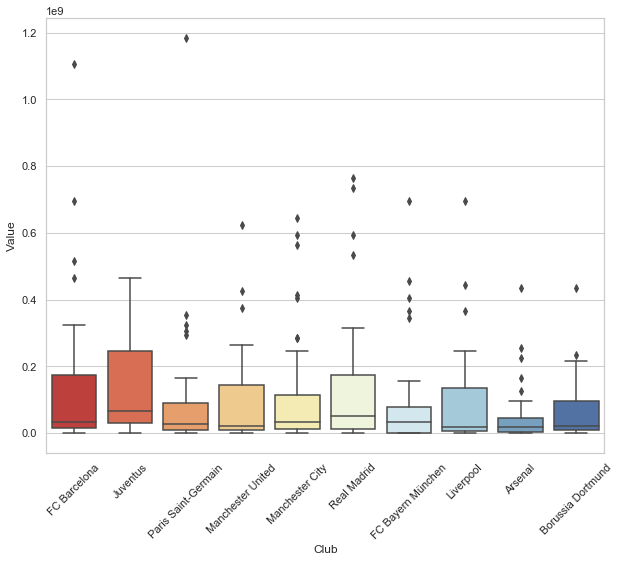

In [17]:
# plotting against market value
sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
p = sns.boxplot(x = 'Club', y = 'Value', data = top_ten_clubs_df, palette = "RdYlBu")
p = plt.xticks(rotation=45)

We can see that Juventus has the more 'expensive' players in terms of market value, followed by Real Madrid and Liverpool.

### V. Players

- Value by age
- Value by position
- Wage by age
- Wage by position

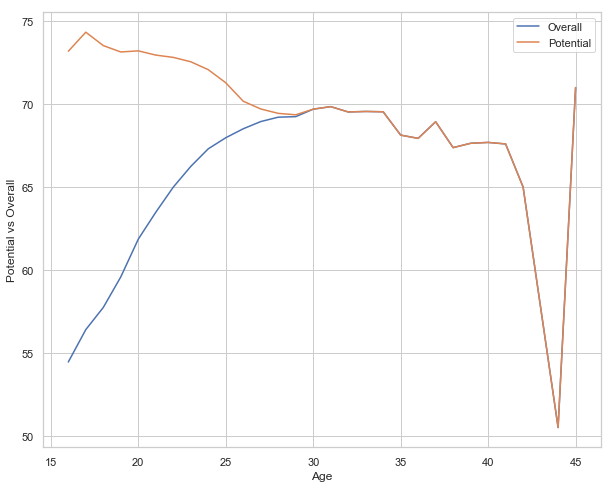

In [18]:
plt.figure(figsize=(10,8))
p = sns.lineplot(x = 'Age', y = 'Overall', ci = None, data = data, label = 'Overall')
p = sns.lineplot(x = 'Age', y = 'Potential', ci = None, data = data, label = 'Potential')
p = plt.ylabel('Potential vs Overall')
p = plt.legend(loc = 1)

We can see that players usually hit their potential around 30 years old. 

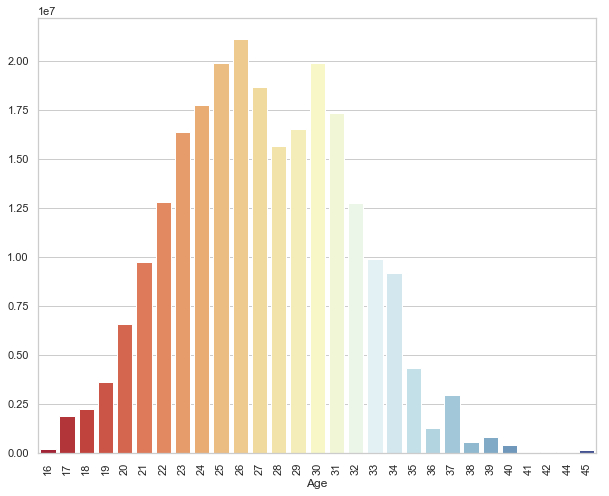

In [19]:
mean_value_per_age = data.groupby('Age')['Value'].mean()
plt.figure(figsize=(10,8))
p = sns.barplot(x = mean_value_per_age.index, y = mean_value_per_age.values, palette = "RdYlBu")
p = plt.xticks(rotation=90)

We can see that players' are valued at the highest between ages 23 - 31, and peaking at age 26.

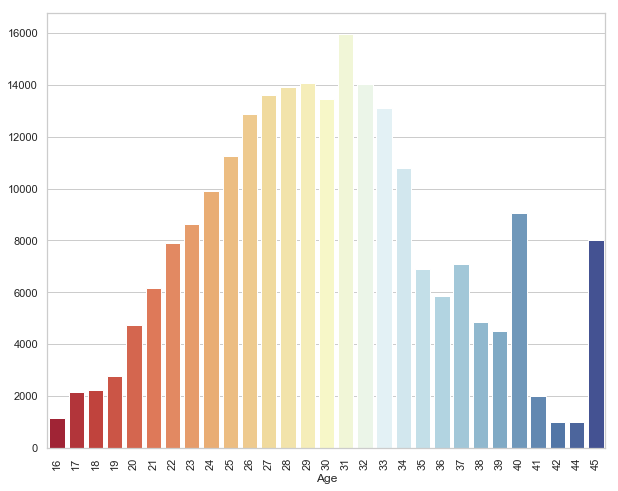

In [20]:
mean_wage_per_age = data.groupby('Age')['Wage'].mean()
plt.figure(figsize=(10,8))
p = sns.barplot(x = mean_wage_per_age.index, y = mean_wage_per_age.values, palette = "RdYlBu")
p = plt.xticks(rotation=90)

We are see that the players' wages are relatively steady between 26-33, peaking at age 31, and on a decline after age 33.

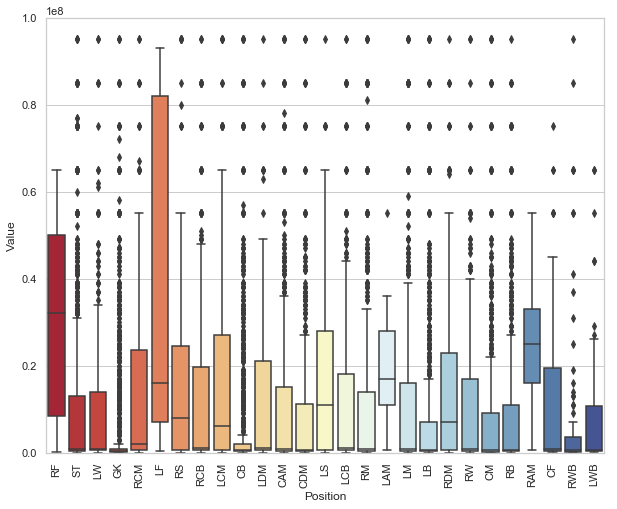

In [21]:
avg_value_by_position = data.groupby('Position')['Value'].mean()
plt.figure(figsize=(10,8))
p = sns.boxplot(x = 'Position', y = 'Value', data = data, palette = "RdYlBu")
p = plt.xticks(rotation=90)
p = plt.ylim(0, 100000000)

Most valued positions in terms of market value are LF and RF. 
We can see that the order follows forwards > midfielders > defenders > goalkeepers.

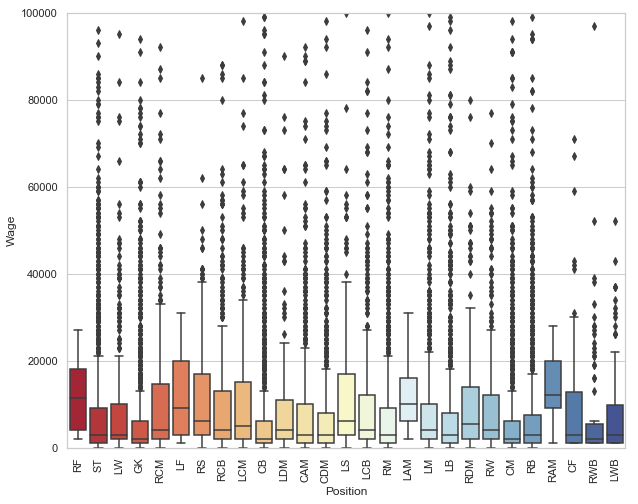

In [22]:
avg_wage_by_position = data.groupby('Position')['Wage'].mean()
plt.figure(figsize=(10,8))
p = sns.boxplot(x = 'Position', y = 'Wage', data = data, palette = "RdYlBu")
p = plt.xticks(rotation=90)
p = plt.ylim(0, 100000)

We can see that the trend of the wages is related to their market value as we see the same order of decreasing wages as compared to their market value.